# Capa Oro: Datos listos

En este notebook realizamos la construcción de la **Capa Oro**.

**Objetivos:**
- Integrar y depurar los datos de la Capa Plata.
- Generar variables derivadas (ej: amplitud térmica, rangos de presión y humedad).
- Validar la calidad final de los datos.
- Exportar los datasets listos para minería de datos y modelos predictivos.

# Importar las librerías necesarias

In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

PLATA_DIR = Path('../data/plata')
ORO_DIR = Path('../data/oro')
ORO_DIR.mkdir(parents=True, exist_ok=True)

# Archivos de entrada
archivo_diario = PLATA_DIR / 'dataset_plata_diario_final.csv'
archivo_horario = PLATA_DIR / 'dataset_plata_horario_final.csv'

print("Importación de librerías completada.")

Importación de librerías completada.


## Carga de Datos
Leemos los archivos generados en la **Capa Plata**.

In [2]:
# Lectura de datasets
df_diario = pd.read_csv(archivo_diario, parse_dates=['FECHA'])
df_horario = pd.read_csv(archivo_horario, parse_dates=['FECHA_HORA'])

print('Datos cargados:')
print(' - Diario:', df_diario.shape)
print(' - Horario:', df_horario.shape)

df_diario.info()
display(df_diario.head())
df_horario.info()
display(df_horario.head())

Datos cargados:
 - Diario: (3, 22)
 - Horario: (64, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ESTACION              3 non-null      object        
 1   FECHA                 3 non-null      datetime64[ns]
 2   TEMP_MEAN             3 non-null      float64       
 3   TEMP_MIN              3 non-null      int64         
 4   TEMP_MAX              3 non-null      int64         
 5   PNM_MEAN              3 non-null      float64       
 6   PNM_MIN               3 non-null      int64         
 7   PNM_MAX               3 non-null      int64         
 8   HUM_MEAN              3 non-null      float64       
 9   HUM_MIN               3 non-null      int64         
 10  HUM_MAX               3 non-null      int64         
 11  WIND_DIR_MEAN         3 non-null      float64       
 12  WIND_DIR_MIN          3 no

,ESTACION,FECHA,TEMP_MEAN,TEMP_MIN,TEMP_MAX,PNM_MEAN,PNM_MIN,PNM_MAX,HUM_MEAN,HUM_MIN,...,WIND_DIR_MIN,WIND_DIR_MAX,WIND_SPEED_MEAN,WIND_SPEED_MIN,WIND_SPEED_MAX,TEMP_MEAN_NORM,PNM_MEAN_NORM,HUM_MEAN_NORM,WIND_DIR_MEAN_NORM,WIND_SPEED_MEAN_NORM
0,CONCORDIA AERO,2024-06-01,17.5,15,22,1015.0,1013,1016,82.8,66,...,20,360,12.0,4,20,0.07143,1.00,1.00000,0.00000,1.0
1,GUALEGUAYCHU AERO,2024-06-01,18.8,14,25,1013.3,1012,1015,76.9,56,...,20,360,10.5,4,24,1.00000,0.15,0.00000,0.77513,0.7
2,PARANA AERO,2024-06-01,17.4,13,24,1013.0,1011,1015,80.5,57,...,0,360,7.0,0,17,0.00000,0.00,0.61017,1.00000,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   NOMBRE            64 non-null     object        
 1   FECHA_HORA        64 non-null     datetime64[ns]
 2   FECHA             64 non-null     object        
 3   HORA              64 non-null     int64         
 4   TEMP              64 non-null     float64       
 5   HUM               64 non-null     int64         
 6   PNM               64 non-null     float64       
 7   DD                64 non-null     int64         
 8   FF                64 non-null     int64         
 9   estacion_archivo  64 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 5.1+ KB


,NOMBRE,FECHA_HORA,FECHA,HORA,TEMP,HUM,PNM,DD,FF,estacion_archivo
0,CONCORDIA AERO,2024-06-01 00:00:00,2024-06-01,0,16.0,81,1016.5,50,20,20240601_concordia_aero
1,CONCORDIA AERO,2024-06-01 01:00:00,2024-06-01,1,15.2,87,1016.2,30,17,20240601_concordia_aero
2,CONCORDIA AERO,2024-06-01 02:00:00,2024-06-01,2,15.2,87,1016.2,30,17,20240601_concordia_aero
3,CONCORDIA AERO,2024-06-01 03:00:00,2024-06-01,3,15.0,87,1015.6,20,17,20240601_concordia_aero
4,CONCORDIA AERO,2024-06-01 04:00:00,2024-06-01,4,15.0,89,1015.4,30,15,20240601_concordia_aero


## Generación de Variables Derivadas
Creamos nuevas variables útiles para minería de datos y análisis exploratorio:

In [3]:
# Variables derivadas diarias
df_diario['AMP_TERMICA'] = df_diario['TEMP_MAX'] - df_diario['TEMP_MIN']
df_diario['RANGO_PRESION'] = df_diario['PNM_MAX'] - df_diario['PNM_MIN']
df_diario['RANGO_HUMEDAD'] = df_diario['HUM_MAX'] - df_diario['HUM_MIN']

# Redondeo a 1 decimal para consistencia
cols_derivadas = ['AMP_TERMICA', 'RANGO_PRESION', 'RANGO_HUMEDAD']
df_diario[cols_derivadas] = df_diario[cols_derivadas].round(1)

print('Variables derivadas creadas:')
display(df_diario.head())

Variables derivadas creadas:


,ESTACION,FECHA,TEMP_MEAN,TEMP_MIN,TEMP_MAX,PNM_MEAN,PNM_MIN,PNM_MAX,HUM_MEAN,HUM_MIN,...,WIND_SPEED_MIN,WIND_SPEED_MAX,TEMP_MEAN_NORM,PNM_MEAN_NORM,HUM_MEAN_NORM,WIND_DIR_MEAN_NORM,WIND_SPEED_MEAN_NORM,AMP_TERMICA,RANGO_PRESION,RANGO_HUMEDAD
0,CONCORDIA AERO,2024-06-01,17.5,15,22,1015.0,1013,1016,82.8,66,...,4,20,0.07143,1.00,1.00000,0.00000,1.0,7,3,27
1,GUALEGUAYCHU AERO,2024-06-01,18.8,14,25,1013.3,1012,1015,76.9,56,...,4,24,1.00000,0.15,0.00000,0.77513,0.7,11,3,38
2,PARANA AERO,2024-06-01,17.4,13,24,1013.0,1011,1015,80.5,57,...,0,17,0.00000,0.00,0.61017,1.00000,0.0,11,4,40


## Validación Final de la Capa Oro
Confirmamos calidad de datos antes de exportar:

In [4]:
print('Valores nulos por columna:')
print(df_diario.isnull().sum())
print('\nResumen estadístico:')
display(df_diario.describe().T)

# Confirmar fechas continuas
fechas_esperadas = pd.date_range(df_diario['FECHA'].min(), df_diario['FECHA'].max(), freq='D')
faltantes = set(fechas_esperadas.date) - set(df_diario['FECHA'].dt.date.unique())
print(f'Fechas faltantes en diario: {len(faltantes)}')
print(f'Detalle de fechas: {faltantes}')

Valores nulos por columna:
ESTACION                0
FECHA                   0
TEMP_MEAN               0
TEMP_MIN                0
TEMP_MAX                0
PNM_MEAN                0
PNM_MIN                 0
PNM_MAX                 0
HUM_MEAN                0
HUM_MIN                 0
HUM_MAX                 0
WIND_DIR_MEAN           0
WIND_DIR_MIN            0
WIND_DIR_MAX            0
WIND_SPEED_MEAN         0
WIND_SPEED_MIN          0
WIND_SPEED_MAX          0
TEMP_MEAN_NORM          0
PNM_MEAN_NORM           0
HUM_MEAN_NORM           0
WIND_DIR_MEAN_NORM      0
WIND_SPEED_MEAN_NORM    0
AMP_TERMICA             0
RANGO_PRESION           0
RANGO_HUMEDAD           0
dtype: int64

Resumen estadístico:


,count,mean,min,25%,50%,75%,max,std
FECHA,3,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00,NaN
TEMP_MEAN,3.0,17.9,17.4,17.45,17.5,18.15,18.8,0.781025
TEMP_MIN,3.0,14.0,13.0,13.5,14.0,14.5,15.0,1.0
TEMP_MAX,3.0,23.666667,22.0,23.0,24.0,24.5,25.0,1.527525
PNM_MEAN,3.0,1013.766667,1013.0,1013.15,1013.3,1014.15,1015.0,1.078579
PNM_MIN,3.0,1012.0,1011.0,1011.5,1012.0,1012.5,1013.0,1.0
PNM_MAX,3.0,1015.333333,1015.0,1015.0,1015.0,1015.5,1016.0,0.57735
HUM_MEAN,3.0,80.066667,76.9,78.7,80.5,81.65,82.8,2.973774
HUM_MIN,3.0,59.666667,56.0,56.5,57.0,61.5,66.0,5.507571
HUM_MAX,3.0,94.666667,93.0,93.5,94.0,95.5,97.0,2.081666


Fechas faltantes en diario: 0
Detalle de fechas: set()


In [5]:
fechas_esperadas = pd.date_range(
    start=df_diario['FECHA'].min(), 
    end=df_diario['FECHA'].max(), 
    freq='D'
).date

fechas_existentes = set(df_diario['FECHA'].dt.date.unique())
fechas_faltantes = sorted(set(fechas_esperadas) - fechas_existentes)

print("Fechas faltantes detectadas:")
print(fechas_faltantes)

for fecha in fechas_faltantes:
    print(f"\n📅 {fecha} – Estaciones sin datos:")
    estaciones_con_dato = df_diario.loc[df_diario['FECHA'].dt.date == fecha, 'ESTACION'].unique()
    estaciones_sin_dato = set(df_diario['ESTACION'].unique()) - set(estaciones_con_dato)
    print(estaciones_sin_dato)

Fechas faltantes detectadas:
[]


In [6]:
# Fechas esperadas
fechas_esperadas = pd.date_range(
    start=df_diario['FECHA'].min(), 
    end=df_diario['FECHA'].max(), 
    freq='D'
).date

# MultiIndex completo FECHA x ESTACION
estaciones = df_diario['ESTACION'].unique()
index_completo = pd.MultiIndex.from_product([fechas_esperadas, estaciones], names=['FECHA', 'ESTACION'])

# Reindexar y ver filas nulas
df_check = df_diario.set_index(['FECHA', 'ESTACION']).reindex(index_completo)
faltantes = df_check[df_check.isnull().any(axis=1)].reset_index()

print(f"Filas con datos faltantes: {len(faltantes)}")
display(faltantes.head(10))

Filas con datos faltantes: 0


,FECHA,ESTACION,TEMP_MEAN,TEMP_MIN,TEMP_MAX,PNM_MEAN,PNM_MIN,PNM_MAX,HUM_MEAN,HUM_MIN,...,WIND_SPEED_MIN,WIND_SPEED_MAX,TEMP_MEAN_NORM,PNM_MEAN_NORM,HUM_MEAN_NORM,WIND_DIR_MEAN_NORM,WIND_SPEED_MEAN_NORM,AMP_TERMICA,RANGO_PRESION,RANGO_HUMEDAD


## Exportación de la Capa Oro
Guardamos los datasets listos para minería y modelado.

In [7]:
# Exportación a CSV
df_diario.to_csv(ORO_DIR / 'dataset_oro_diario.csv', index=False)
df_horario.to_csv(ORO_DIR / 'dataset_oro_horario.csv', index=False)

print('Archivos exportados en data/oro:')
print(' - dataset_oro_diario.csv')
print(' - dataset_oro_horario.csv')

Archivos exportados en data/oro:
 - dataset_oro_diario.csv
 - dataset_oro_horario.csv


# Resumen y validación final del dataset

In [8]:
print("Resumen general del dataset diario imputado:\n")
print("Filas:", len(df_diario))
print("Columnas:", len(df_diario.columns))
print("Rango temporal:", df_diario['FECHA'].min(), "→", df_diario['FECHA'].max())

print("\nValores nulos por columna:")
print(df_diario.isnull().sum())

print("\nEstadísticas descriptivas de las variables numéricas:")
print(df_diario.describe().T)

Resumen general del dataset diario imputado:

Filas: 3
Columnas: 25
Rango temporal: 2024-06-01 00:00:00 → 2024-06-01 00:00:00

Valores nulos por columna:
ESTACION                0
FECHA                   0
TEMP_MEAN               0
TEMP_MIN                0
TEMP_MAX                0
PNM_MEAN                0
PNM_MIN                 0
PNM_MAX                 0
HUM_MEAN                0
HUM_MIN                 0
HUM_MAX                 0
WIND_DIR_MEAN           0
WIND_DIR_MIN            0
WIND_DIR_MAX            0
WIND_SPEED_MEAN         0
WIND_SPEED_MIN          0
WIND_SPEED_MAX          0
TEMP_MEAN_NORM          0
PNM_MEAN_NORM           0
HUM_MEAN_NORM           0
WIND_DIR_MEAN_NORM      0
WIND_SPEED_MEAN_NORM    0
AMP_TERMICA             0
RANGO_PRESION           0
RANGO_HUMEDAD           0
dtype: int64

Estadísticas descriptivas de las variables numéricas:
                     count                 mean                  min  \
FECHA                    3  2024-06-01 00:00:00  2024-06

# Visualizaciones

## Series promedio de las variables por estación

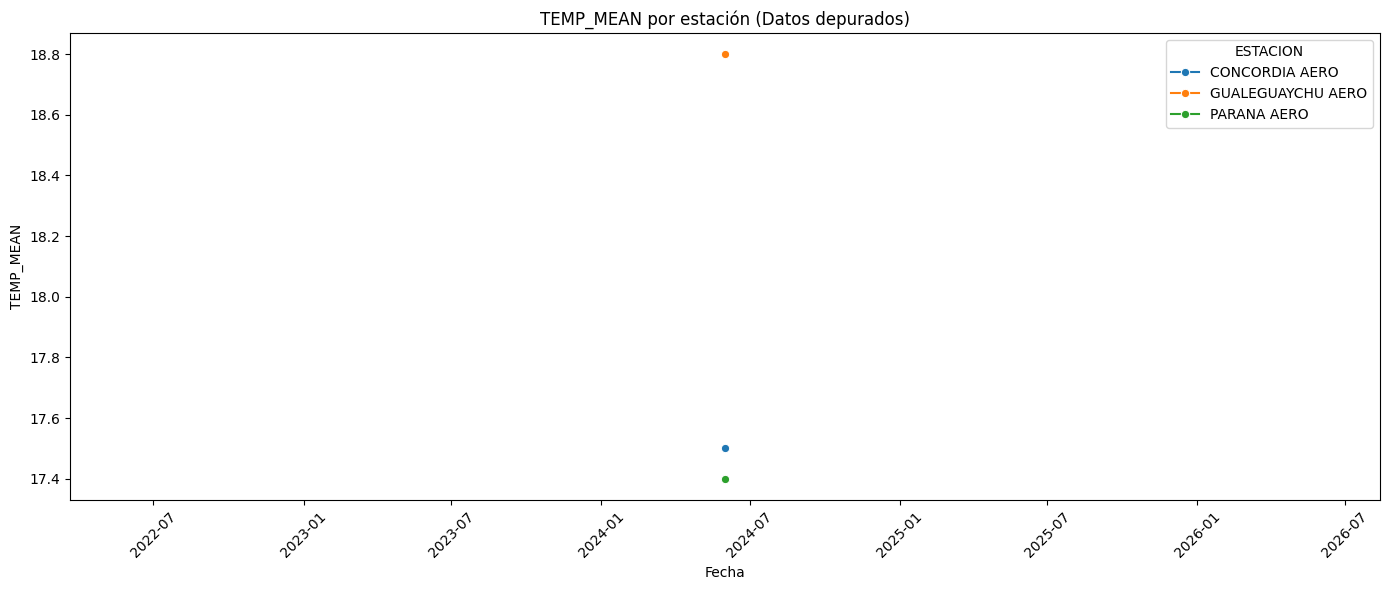

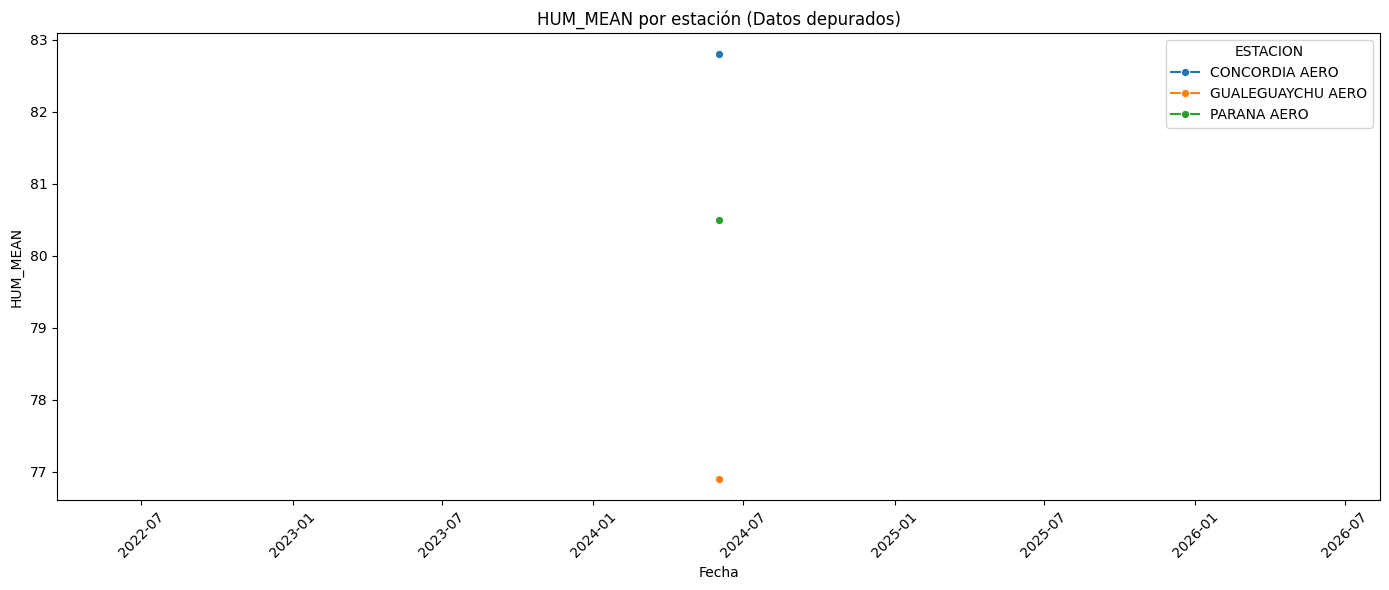

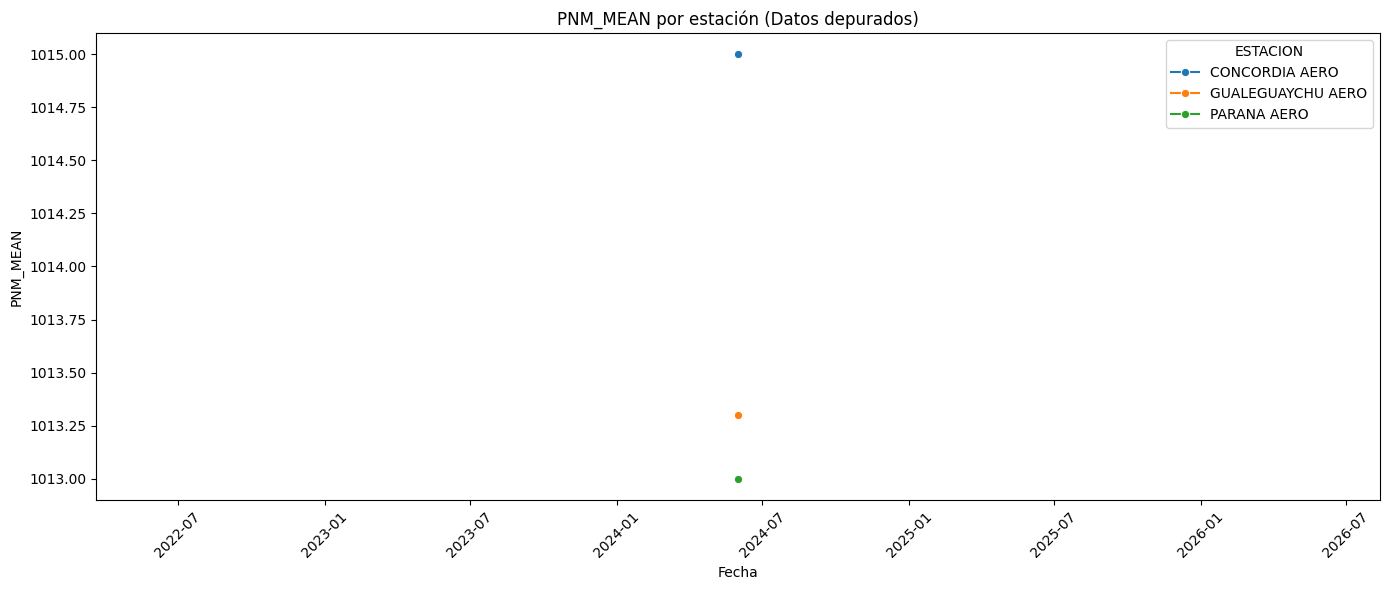

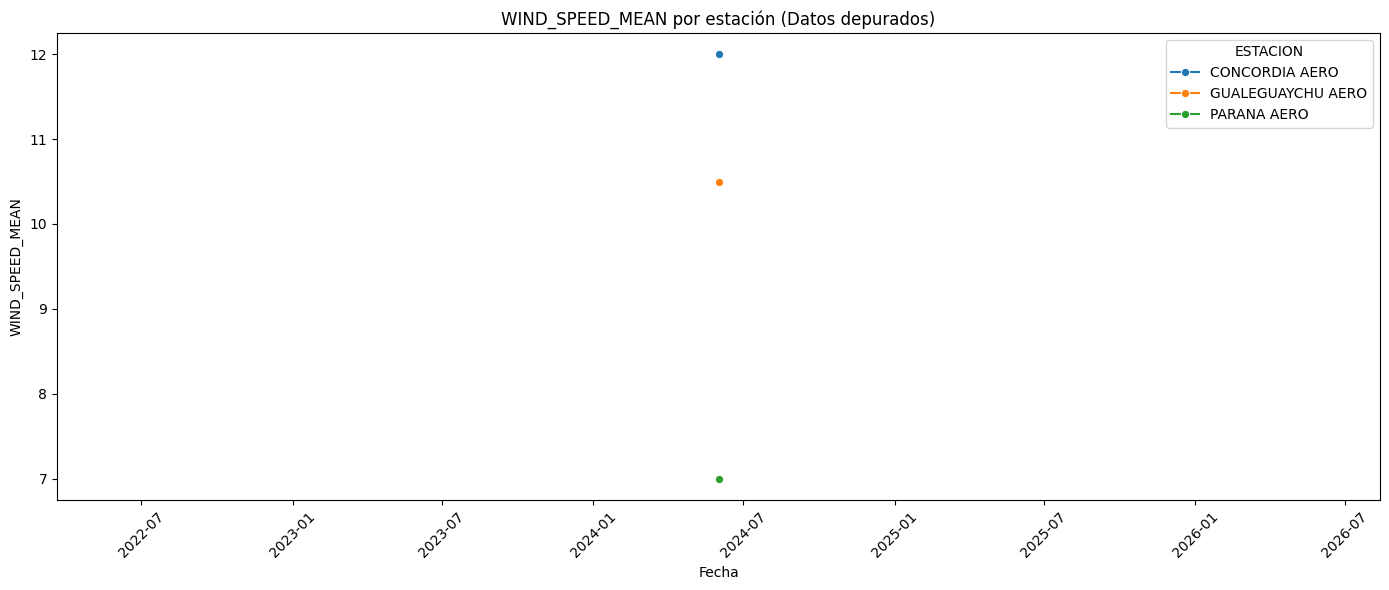

In [9]:
# Seleccionamos columnas clave
variables_clave = [
    'TEMP_MEAN', 'HUM_MEAN', 'PNM_MEAN', 'WIND_SPEED_MEAN'
]

# Gráfico de series temporales por estación
for var in variables_clave:
    plt.figure(figsize=(14,6))
    sns.lineplot(data=df_diario, x='FECHA', y=var, hue='ESTACION', marker='o')
    plt.title(f'{var} por estación (Datos depurados)')
    plt.xlabel("Fecha")
    plt.ylabel(var)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Distribución (Histograma) de cada variable clave

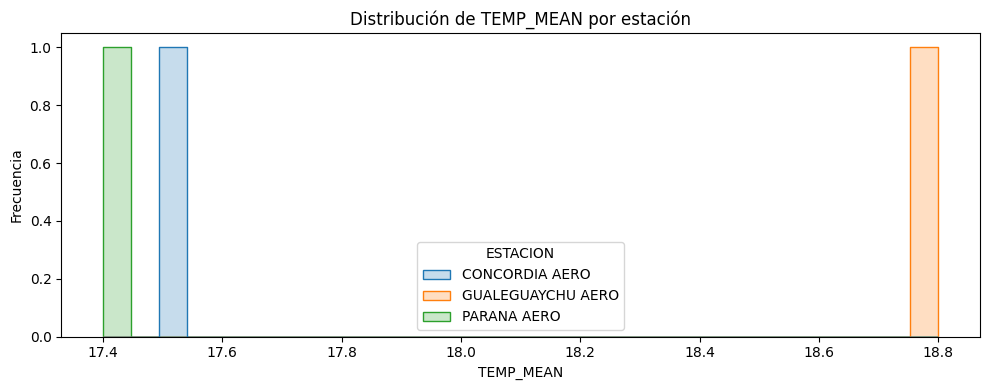

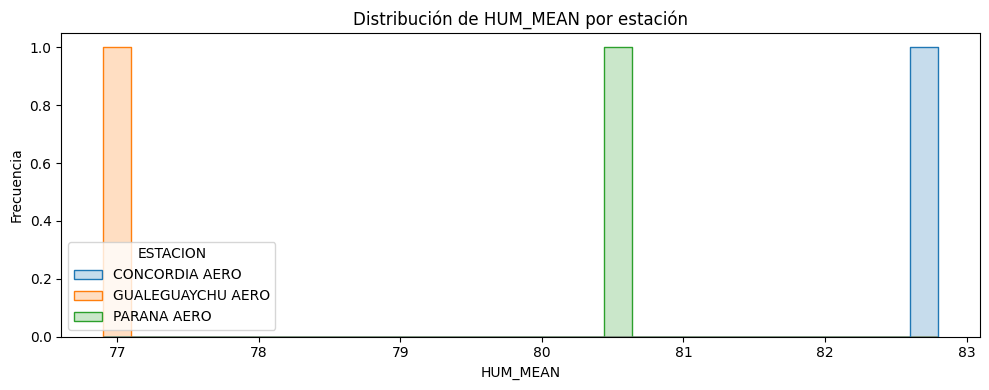

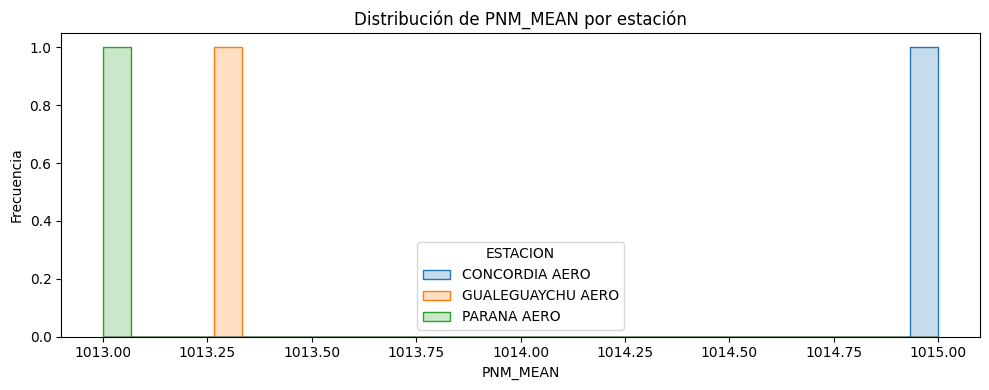

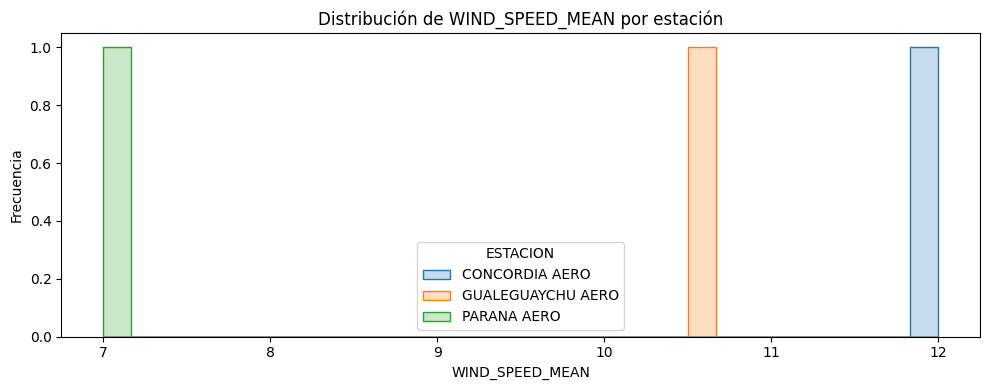

In [10]:
for var in variables_clave:
    plt.figure(figsize=(10,4))
    sns.histplot(data=df_diario, x=var, hue='ESTACION', bins=30, kde=True, element="step")
    plt.title(f'Distribución de {var} por estación')
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

## Boxplots para comparar rangos entre estaciones

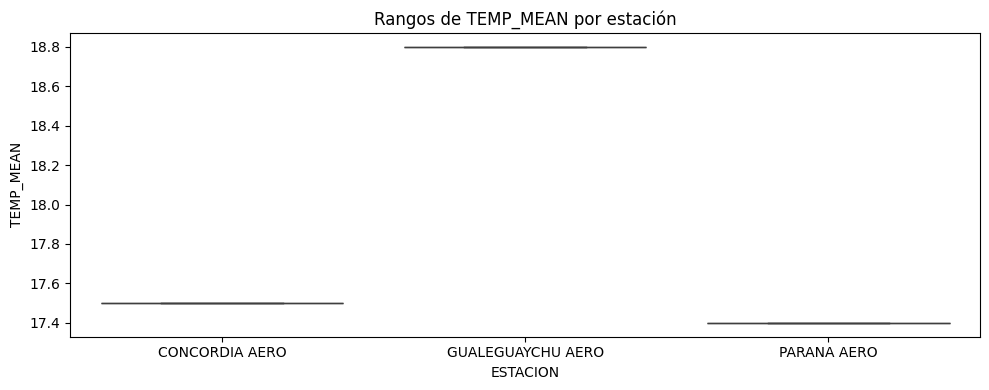

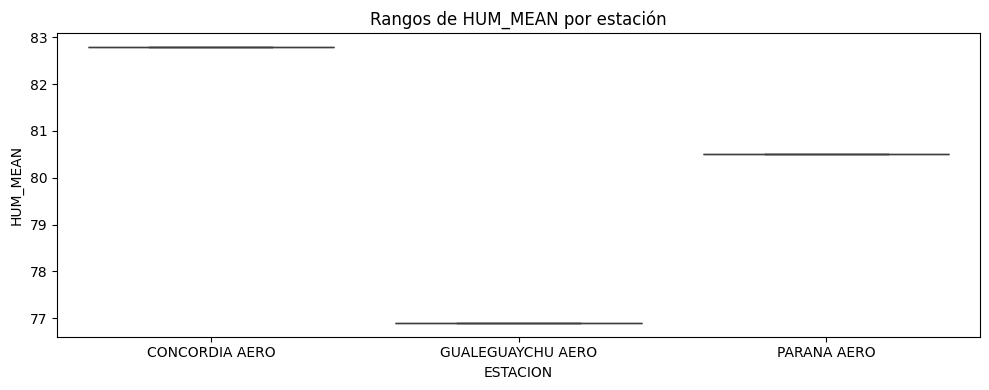

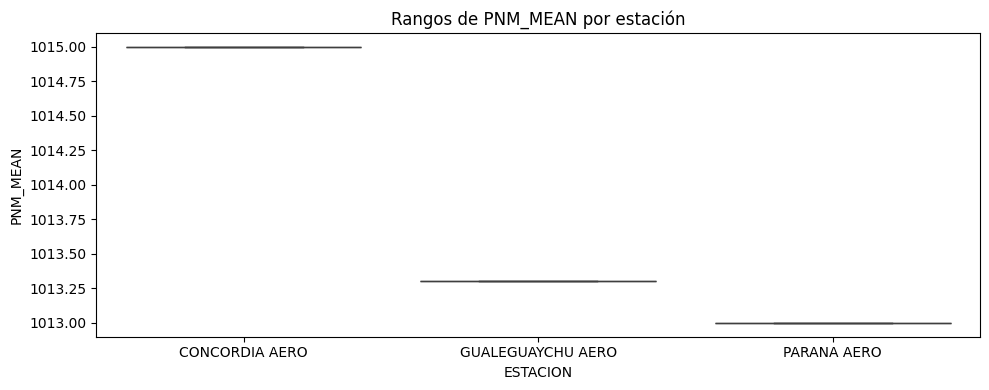

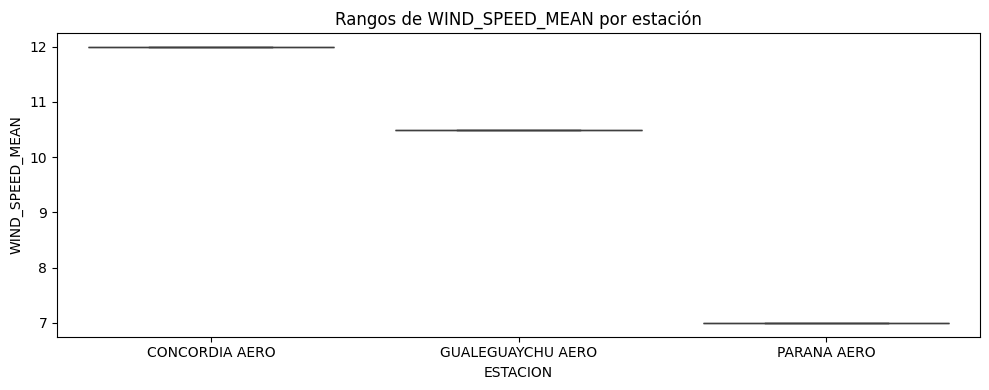

In [11]:
for var in variables_clave:
    plt.figure(figsize=(10,4))
    sns.boxplot(data=df_diario, x='ESTACION', y=var)
    plt.title(f'Rangos de {var} por estación')
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()

## Heatmap de correlación entre variables principales

/usr/local/lib/python3.10/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


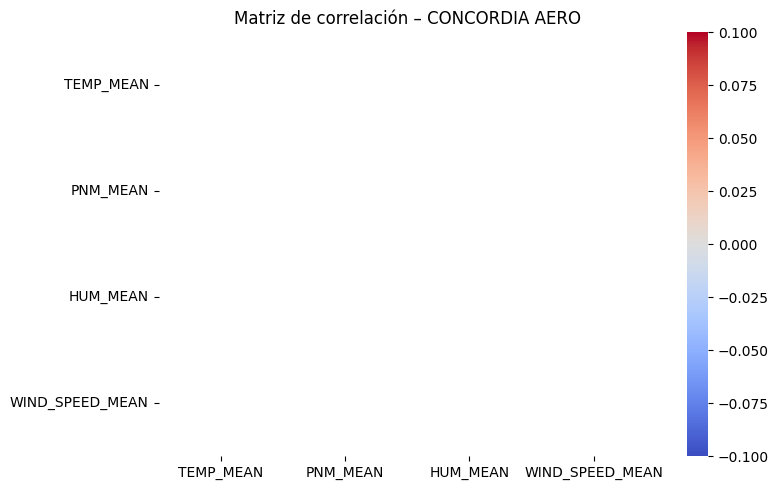

/usr/local/lib/python3.10/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


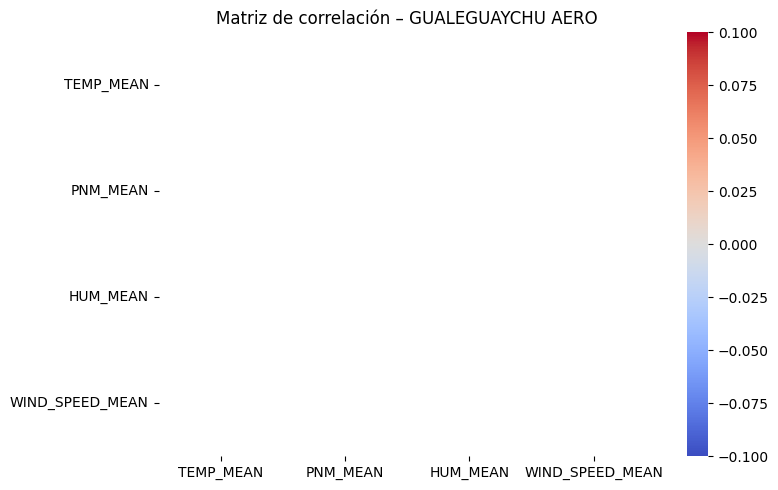

/usr/local/lib/python3.10/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


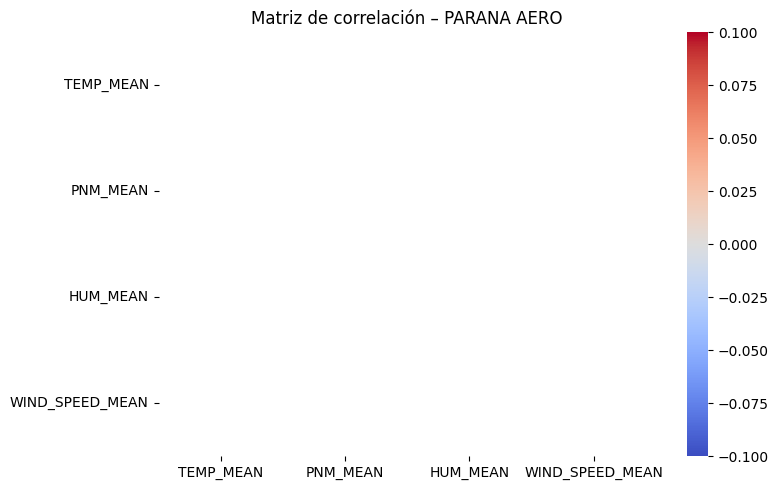

In [12]:
# Variables a incluir en la matriz de correlación
variables_corr = ['TEMP_MEAN','PNM_MEAN','HUM_MEAN','WIND_SPEED_MEAN']

# Iterar por cada estación
for estacion in df_diario['ESTACION'].unique():
    df_est = df_diario[df_diario['ESTACION'] == estacion]
    
    # Calcular correlación
    corr_matrix = df_est[variables_corr].corr()
    
    # Crear gráfico
    plt.figure(figsize=(8,5))
    sns.heatmap(
        corr_matrix,
        annot=True,
        cmap='coolwarm',
        fmt=".2f",
        cbar=True
    )
    plt.title(f'Matriz de correlación – {estacion}')
    plt.tight_layout()
    plt.show()


# Comparación antes y después de la imputación


📊 Gráficos para estación: CONCORDIA AERO


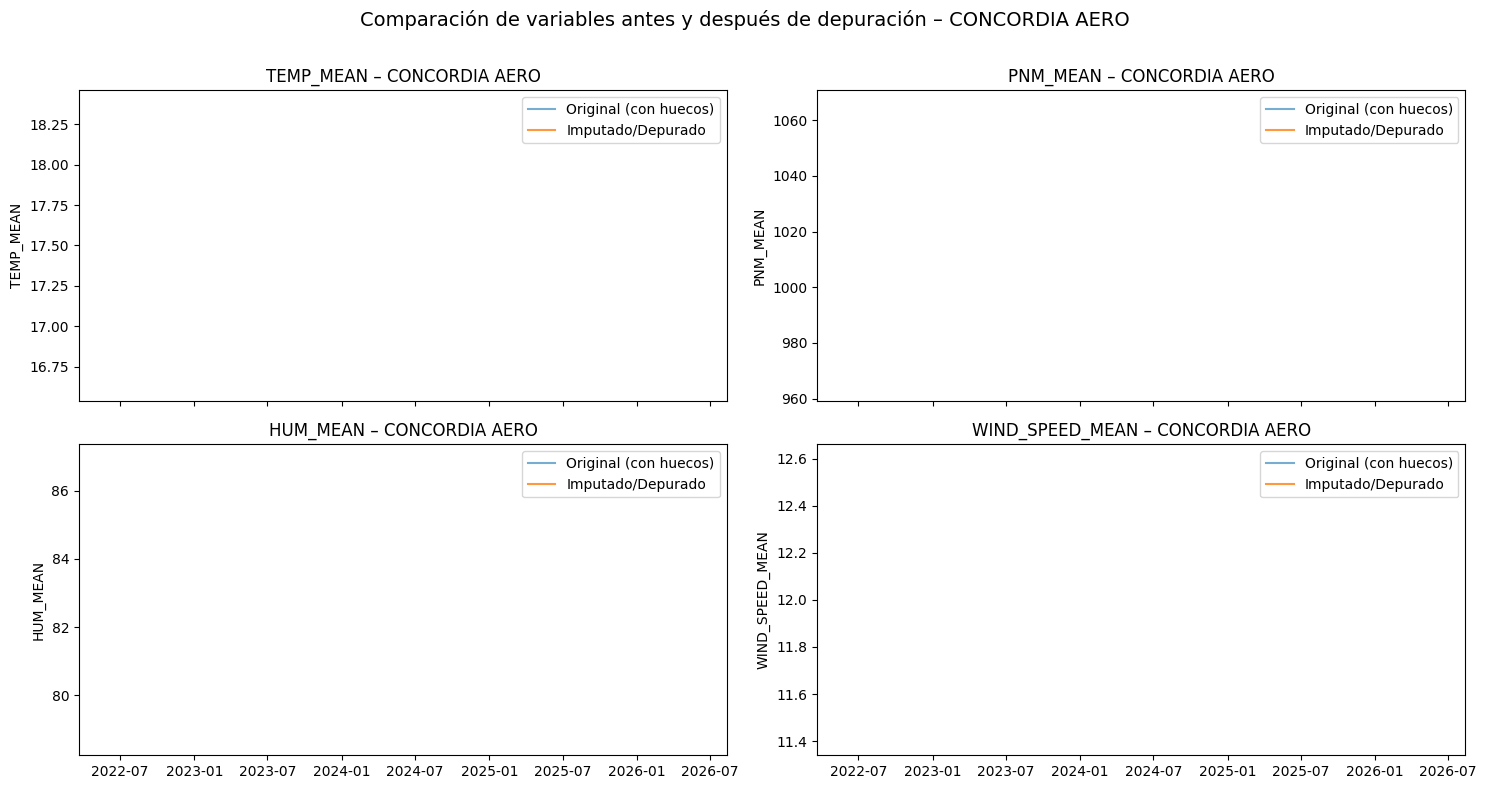


📊 Gráficos para estación: GUALEGUAYCHU AERO


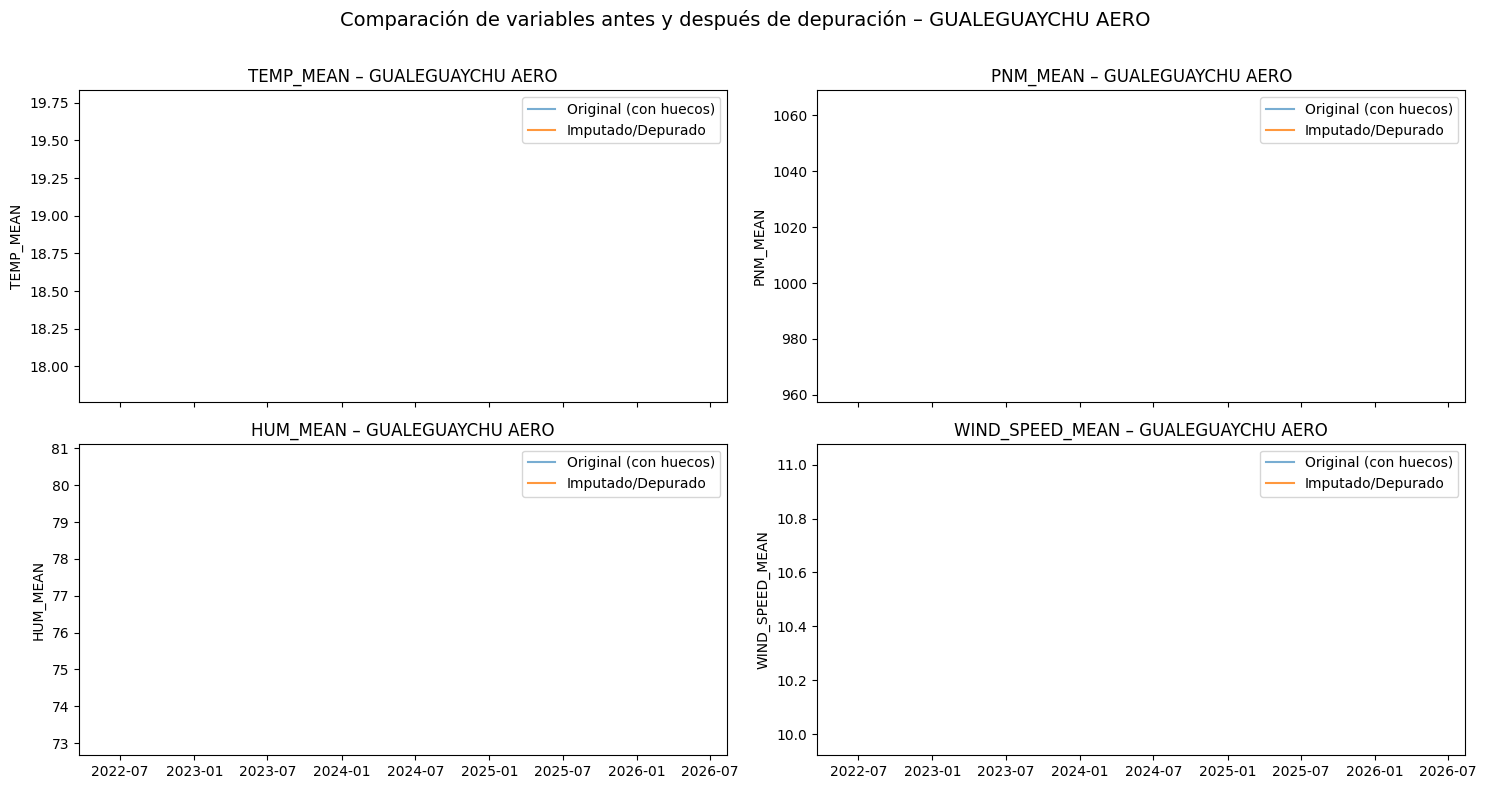


📊 Gráficos para estación: PARANA AERO


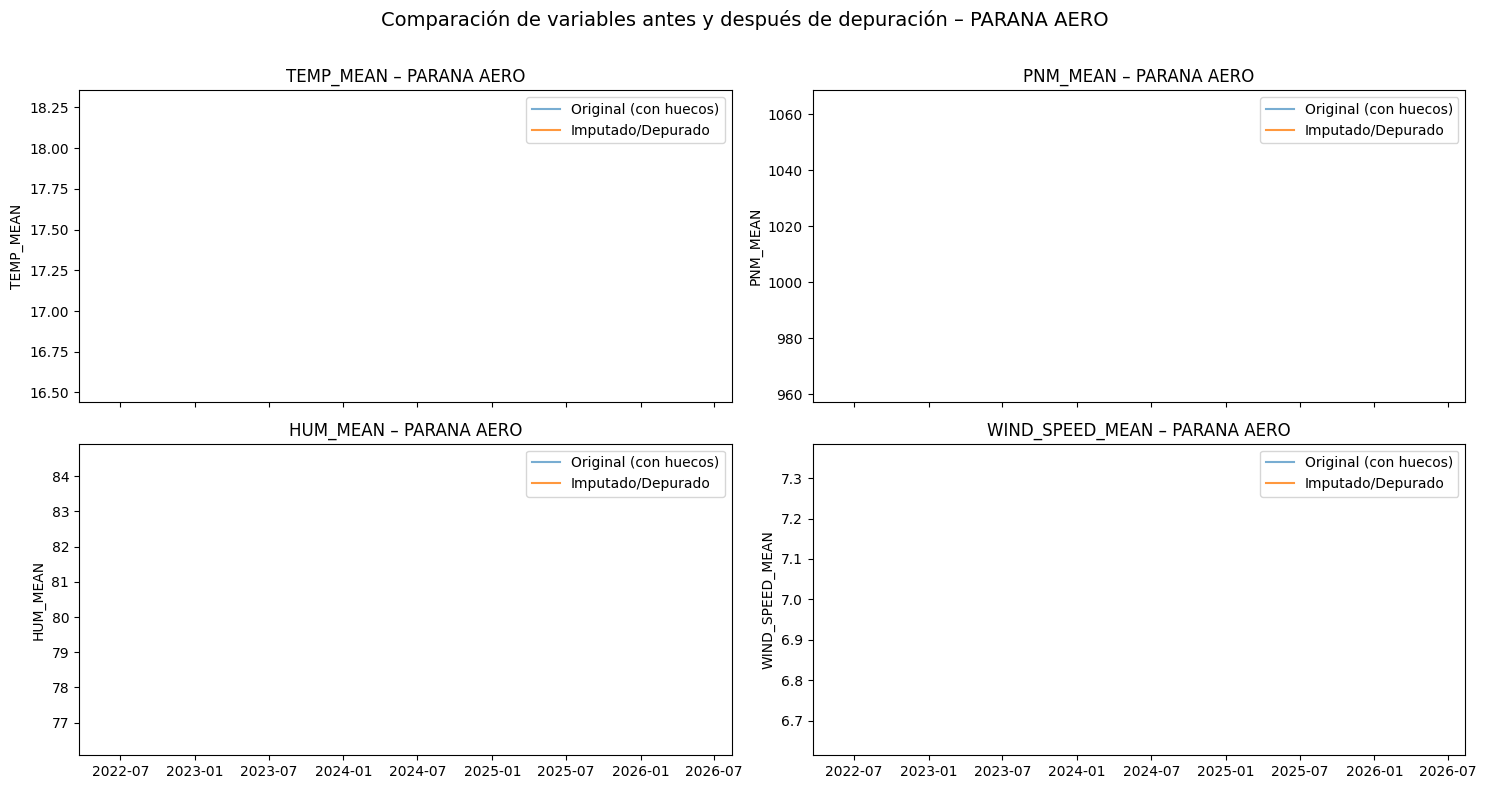

In [13]:
# Variables de interés
variables_corr = ['TEMP_MEAN','PNM_MEAN','HUM_MEAN','WIND_SPEED_MEAN']

# Dataset original y depurado
df_original = pd.read_csv(PLATA_DIR / "dataset_plata_inicial.csv", parse_dates=['FECHA'])
df_dep = df_diario.copy()

# Iterar por cada estación
for estacion in df_original['ESTACION'].unique():
    df_orig_est = df_original[df_original['ESTACION'] == estacion]
    df_dep_est = df_dep[df_dep['ESTACION'] == estacion]
    
    print(f"\n📊 Gráficos para estación: {estacion}")
    
    # Crear subplots: 2 filas x 2 columnas (para las 4 variables)
    fig, axes = plt.subplots(2, 2, figsize=(15, 8), sharex=True)
    axes = axes.flatten()
    
    for i, var in enumerate(variables_corr):
        # Agrupar por fecha
        df_original_group = df_orig_est.groupby('FECHA')[var].mean()
        df_dep_group = df_dep_est.groupby('FECHA')[var].mean()

        # Graficar
        axes[i].plot(df_original_group.index, df_original_group.values, label='Original (con huecos)', alpha=0.6)
        axes[i].plot(df_dep_group.index, df_dep_group.values, label='Imputado/Depurado', alpha=0.8)
        axes[i].set_title(f'{var} – {estacion}', fontsize=12)
        axes[i].set_ylabel(var)
        axes[i].legend()

    plt.suptitle(f'Comparación de variables antes y después de depuración – {estacion}', fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

# Conclusión

En esta etapa se trabajó sobre la **Capa Oro**, última fase del pipeline de datos, donde la información ya había sido limpiada y estructurada en la Capa Plata.  
El objetivo principal fue **preparar los datos para análisis avanzados y la generación de valor** mediante un conjunto de pasos clave:

1. **Selección de variables relevantes** para el modelado y análisis.  
2. **Normalización y codificación final** para garantizar compatibilidad con algoritmos.  
3. **División de datos en conjuntos de entrenamiento y prueba** para futuras tareas de clasificación o predicción.  
4. **Validación de consistencia y control de calidad**, evitando valores atípicos o inconsistencias que puedan afectar los modelos.  

Con la creación de esta capa, se completa el proceso de **depuración y validación de datos**, dejando la información **lista para aplicaciones analíticas, minería de datos y desarrollo de modelos predictivos**.  

La **Capa Oro** se convierte así en la **fuente confiable y optimizada** del proyecto, donde cada registro ha pasado por un flujo de **ingesta, limpieza, transformación y validación final**, asegurando **trazabilidad y calidad de la información** para su explotación.